In [3]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [5]:
train_df = pd.read_csv('Titanic/train.csv')
test_df =pd.read_csv('Titanic/test.csv')
combine = [train_df, test_df]

In [5]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
#corelating numeric features
#corelating numerical and ordinal feature
#corelating b/w categorical


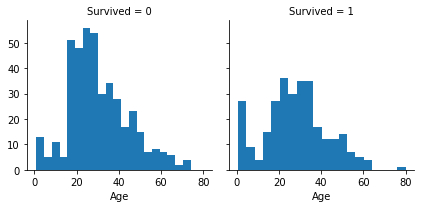

In [8]:
#corelating numeric features

g=sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

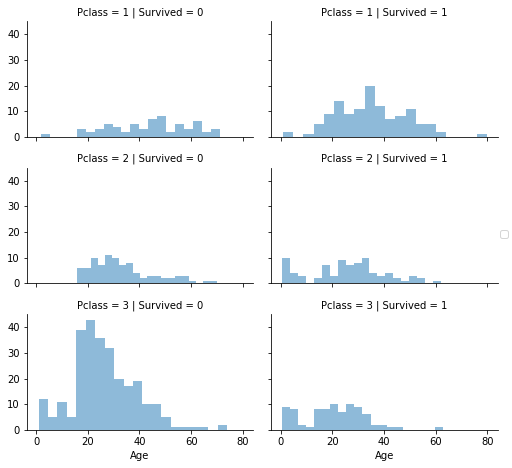

In [9]:
#corelating numerical and ordinal feature

grid=sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()

c:\python\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\python\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


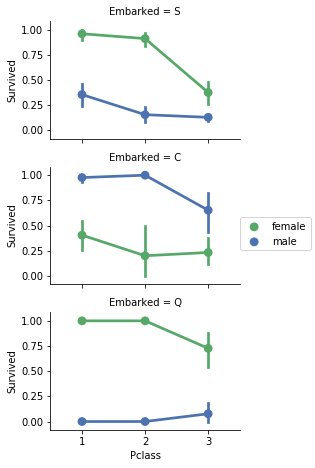

In [13]:
#corelating b/w categorical

grid=sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

c:\python\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


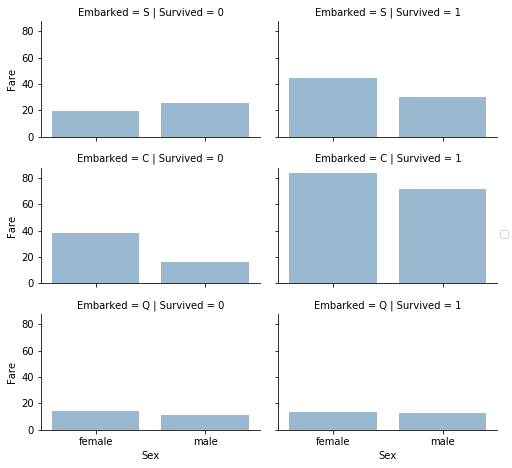

In [16]:
grid=sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=0.5, ci=None)
grid.add_legend()

In [ ]:
#Data wrangling
#categorical

#convert to a number
#convert to number bin a number

#combine levels
#using frequency of response rate

In [ ]:
#high cardinality

In [ ]:
a - 90% - 3
b - 80% - 5
c - 70% - 12

In [ ]:
#completing numerical features

In [ ]:
#completing category features

In [ ]:
#Session-4

In [6]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape



Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [7]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [8]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [9]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [10]:
train_df = train_df.drop(['PassengerId'], axis=1)
combine = [train_df, test_df]


((891, 10), (418, 10))

In [13]:
test_df = test_df.drop(['PassengerId'], axis=1)
train_df.shape, test_df.shape

((891, 10), (418, 9))

In [11]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

In [12]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

In [ ]:
#Converting a categorical feature

In [14]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,1


In [16]:
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

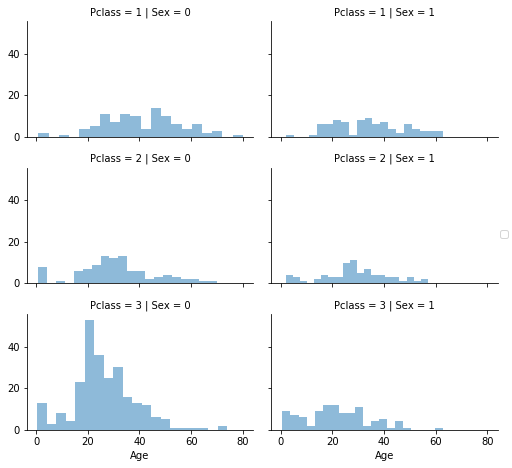

In [17]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()


In [2]:
combined

NameError: name 'combined' is not defined

In [ ]:
guess_ages = np.zeros((2,3))
guess_ages

In [ ]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

In [18]:
combine

[     Survived  Pclass                                               Name  Sex  \
 0           0       3                            Braund, Mr. Owen Harris    0   
 1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
 2           1       3                             Heikkinen, Miss. Laina    1   
 3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
 4           0       3                           Allen, Mr. William Henry    0   
 5           0       3                                   Moran, Mr. James    0   
 6           0       1                            McCarthy, Mr. Timothy J    0   
 7           0       3                     Palsson, Master. Gosta Leonard    0   
 8           1       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    1   
 9           1       2                Nasser, Mrs. Nicholas (Adele Achem)    1   
 10          1       3                    Sandstrom, Miss. Marguerite Rut    1   
 11          1  

In [ ]:
i=0
j=1


In [19]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [20]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,7.2500,S,1,"(16.336, 32.252]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,71.2833,C,3,"(32.252, 48.168]"
2,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,7.9250,S,2,"(16.336, 32.252]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,53.1000,S,3,"(32.252, 48.168]"
4,0,3,"Allen, Mr. William Henry",0,2.0,0,0,8.0500,S,1,"(32.252, 48.168]"


In [21]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,7.9250,S,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",0,2.0,0,0,8.0500,S,1


In [23]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [24]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [25]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,"Braund, Mr. Owen Harris",0,1.0,7.2500,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,71.2833,C,3,0
2,1,3,"Heikkinen, Miss. Laina",1,1.0,7.9250,S,2,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,53.1000,S,3,0
4,0,3,"Allen, Mr. William Henry",0,2.0,8.0500,S,1,1


In [ ]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

In [ ]:
#continous 
- mean, median, sd
- logic
- put a placeholder - (-1)

#categorical
- max class
- logic (pclass = 1 , age > 20, familysize > 4 = C)
- 

missing values imputation by chained equationsa


In [28]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [29]:
for dataset in combine:
    dataset['Embarked'] =  dataset['Embarked'].fillna(freq_port)

In [30]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,"Braund, Mr. Owen Harris",0,1.0,7.2500,0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,71.2833,1,3,0
2,1,3,"Heikkinen, Miss. Laina",1,1.0,7.9250,0,2,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,53.1000,0,3,0
4,0,3,"Allen, Mr. William Henry",0,2.0,8.0500,0,1,1


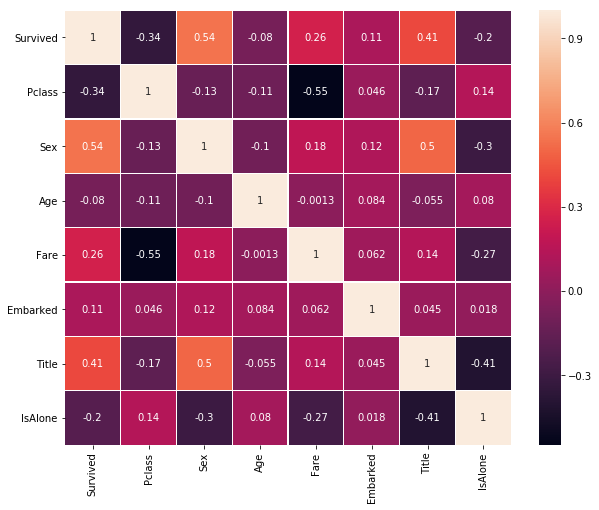

In [32]:
sns.heatmap(train_df.corr(), annot = True,  linewidth=0.2)

fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [46]:
for dataset in test_df:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

test_df.head()

TypeError: string indices must be integers

In [50]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
x_test['Sex']=le.fit_transform(x_test['Sex'])

In [47]:
for dataset in test_df:
    print(dataset)

Pclass
Name
Sex
Age
Fare
Embarked
Title
IsAlone


In [33]:
#LG
#KNN
#SVM
#NB
#DT

In [ ]:
#RF

In [34]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare', 'Embarked', 'Title',
       'IsAlone'],
      dtype='object')

In [35]:
test_df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'IsAlone'], dtype='object')

In [39]:
x_train=train_df.drop(['Name','Survived'], axis=1)
y_train=train_df['Survived']
x_test=test_df.drop('Name', axis=1)

x_train.shape, y_train.shape, x_test.shape



((891, 7), (891,), (418, 7))

In [42]:
x_train=x_train.fillna(-1)
x_test=x_test.fillna(-1)

In [51]:
x_test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,3,1,34.5,7.8292,2,1,1
1,3,0,47.0,7.0000,0,3,0
2,2,1,62.0,9.6875,2,1,1
3,3,1,27.0,8.6625,0,1,1
4,3,0,22.0,12.2875,0,3,0


In [52]:
#logreg

logreg=LogisticRegression()
logreg.fit(x_train, y_train)

y_pred=logreg.predict(x_test)


In [54]:
scc=round(logreg.score(x_train, y_train)*100,2)

In [55]:
scc

78.109999999999999

In [56]:
#svm

clf=SVC()
clf.fit(x_train, y_train)

y_pred=clf.predict(x_test)
scc=round(clf.score(x_train, y_train)*100,2)
scc

88.219999999999999

In [59]:
from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)

y_pred=clf.predict(x_test)
scc=round(clf.score(x_train, y_train)*100,2)
scc

86.760000000000005

In [60]:
clf=GaussianNB()
clf.fit(x_train, y_train)

y_pred=clf.predict(x_test)
scc=round(clf.score(x_train, y_train)*100,2)
scc

77.219999999999999

In [62]:
#Decsion Tree
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred=clf.predict(x_test)
scc=round(clf.score(x_train, y_train)*100,2)
scc

94.840000000000003

In [63]:
clf=RandomForestClassifier()
clf.fit(x_train, y_train)

y_pred=clf.predict(x_test)
scc=round(clf.score(x_train, y_train)*100,2)
scc

93.489999999999995

In [ ]:
#create a tale with accuracies from diff. algos
